# Time Series Forecasting with LSTM

## Imports

In [171]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from pylab import rcParams
import plotly
import plotly.graph_objs as go
from pathlib import Path
# from plotly import go
# matplotlib.rcParams['axes.labelsize'] = 14
# matplotlib.rcParams['xtick.labelsize'] = 12
# matplotlib.rcParams['ytick.labelsize'] = 12
# matplotlib.rcParams['text.color'] = 'k'

## Data import

In [183]:
# fix random seed for reproducibility
np.random.seed(42)

In [184]:
root = Path('/Users','alexandreberkovic','Desktop', 'Year_4','SIoT','IoT')

In [185]:
df = pd.read_csv(root / 'Output_data/CSV/sensor.csv')

In [186]:
df.columns

Index(['Humidity', 'Temperature', 'Light', 'Time stamp', 'Date'], dtype='object')

In [187]:
df = df.drop('Date',axis = 1)

In [188]:
# time stamp column to ts instead of string
df['Time stamp'] = pd.to_datetime(df['Time stamp'], infer_datetime_format=True)

In [189]:
# # remove humidity levels below 50 (as those should not occur)
df = df.loc[df['Humidity'] >= 50]
# df = df.reset_index()

In [190]:
df.set_axis(df['Time stamp'], inplace=True)

In [180]:
df2 = df.resample('10min').mean()

In [102]:
df2 = df2[3052:]

In [103]:
# Resample 3 seconds
df.set_index('Time stamp').resample('3s').mean()

,Humidity,Temperature,Light
Time stamp,,,
2021-11-13 18:45:09,62.2,20.0,1256.0
2021-11-13 18:45:12,NaN,NaN,NaN
2021-11-13 18:45:15,NaN,NaN,NaN
2021-11-13 18:45:18,NaN,NaN,NaN
2021-11-13 18:45:21,NaN,NaN,NaN
...,...,...,...
2021-12-13 18:49:24,NaN,NaN,NaN
2021-12-13 18:49:27,NaN,NaN,NaN
2021-12-13 18:49:30,NaN,NaN,NaN


In [104]:
df.set_index('Time stamp').resample('H').pipe(lambda x: x.max() - x.min())

,Humidity,Temperature,Light
Time stamp,,,
2021-11-13 18:00:00,0.0,0.0,0.0
2021-11-13 19:00:00,2.8,0.7,19.0
2021-11-13 20:00:00,2.4,0.1,11.0
2021-11-13 21:00:00,4.5,0.1,7.0
2021-11-13 22:00:00,1.6,0.3,41.0
...,...,...,...
2021-12-13 14:00:00,1.9,0.4,967.0
2021-12-13 15:00:00,1.1,0.2,743.0
2021-12-13 16:00:00,1.3,0.2,21.0


In [105]:
df.set_index('Time stamp').resample('H',loffset='10s').mean()

/var/folders/34/kt2mvxyx0lx0f3th233kk1200000gn/T/ipykernel_23860/1480750406.py:1: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  df.set_index('Time stamp').resample('H',loffset='10s').mean()


,Humidity,Temperature,Light
Time stamp,,,
2021-11-13 18:00:10,62.200000,20.000000,1256.000000
2021-11-13 19:00:10,64.633333,19.566667,1742.000000
2021-11-13 20:00:10,67.283333,19.283333,1732.000000
2021-11-13 21:00:10,63.183333,19.166667,1733.333333
2021-11-13 22:00:10,59.433333,19.033333,1764.500000
...,...,...,...
2021-12-13 14:00:10,74.250000,20.166667,2413.166667
2021-12-13 15:00:10,73.016667,20.100000,1969.333333
2021-12-13 16:00:10,71.516667,19.950000,1544.833333


In [106]:
df[df['Humidity'].isna()]

,Humidity,Temperature,Light,Time stamp
Time stamp,,,,


<AxesSubplot:xlabel='Time stamp'>

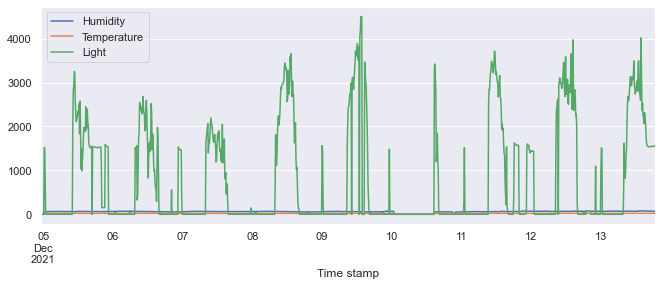

In [107]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11,4)})
df2.fillna(0).plot()

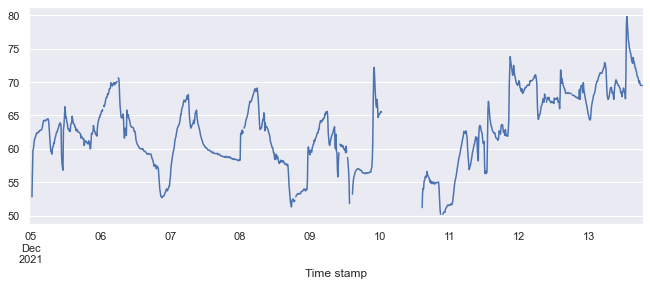

In [156]:
df2['Humidity'].plot()
plt.savefig('empty data.png')

In [160]:
df3 = df2['Humidity'].interpolate('akima').dropna()

In [162]:
df3

Time stamp
2021-12-05 00:20:00    52.8
2021-12-05 00:30:00    56.8
2021-12-05 00:40:00    59.8
2021-12-05 00:50:00    60.0
2021-12-05 01:00:00    60.7
                       ... 
2021-12-13 18:00:00    69.5
2021-12-13 18:10:00    69.5
2021-12-13 18:20:00    69.5
2021-12-13 18:30:00    69.5
2021-12-13 18:40:00    69.5
Freq: 10T, Name: Humidity, Length: 1263, dtype: float64

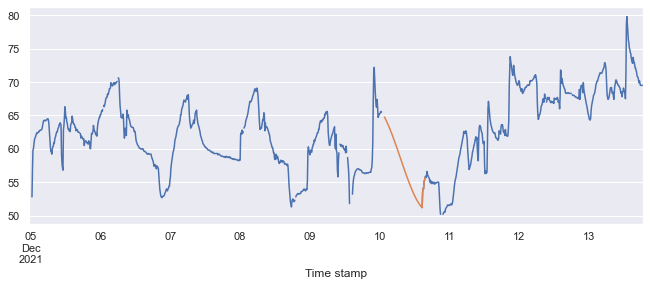

In [163]:
df2['Humidity'].plot()
df3[728:813].plot()
plt.savefig('interpolation.png')

In [ ]:
df3.to_csv('')